In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import difflib #data incoming from a user
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movies/movies.csv


In [2]:
data = pd.read_csv('/kaggle/input/movies/movies.csv')
data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


# Data exploration

In [3]:
data.shape

(4803, 24)

In [4]:
data.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [5]:
data.describe(include=['O'])

,genres,homepage,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,cast,crew,director
count,4775,1712,4391,4803,4803,4800,4803,4803,4802,4803,4803,3959,4803,4760,4803,4773
unique,1168,1691,4219,37,4801,4800,3697,469,3280,544,3,3944,4800,4741,4776,2349
top,Drama,http://www.missionimpossible.com/,independent film,en,Out of the Blue,"In the 22nd century, a paraplegic Marine is di...",[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,The Host,William Shatner Leonard Nimoy DeForest Kelley ...,[],Steven Spielberg
freq,370,4,55,4505,2,1,351,2977,10,3171,4795,3,2,6,28,27


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

# Data preprocessing

In [7]:
data.duplicated().sum()

0

In [8]:
null_val = data.isna().sum()
all_val = len(data.index)
percentage = (null_val/all_val)*100
print(round(percentage , 2))

index                    0.00
budget                   0.00
genres                   0.58
homepage                64.36
id                       0.00
keywords                 8.58
original_language        0.00
original_title           0.00
overview                 0.06
popularity               0.00
production_companies     0.00
production_countries     0.00
release_date             0.02
revenue                  0.00
runtime                  0.04
spoken_languages         0.00
status                   0.00
tagline                 17.57
title                    0.00
vote_average             0.00
vote_count               0.00
cast                     0.90
crew                     0.00
director                 0.62
dtype: float64


* Data cleaning on null values will be as follows:
1. replacing null values in "keywords", "genre", "tagline" columns with mode values
2. dropping "homepage" column
3.  dropping null values' rows in "overview","releasedate", "cast","director" columns. They only represent 1.6% of data.
4. repalcing null values in "runtime" column with mean value*


In [9]:
mode_genres = data['genres'].mode()
mode_tagline = data['tagline'].mode()
mode_keywords  = data['keywords'].mode()
print(mode_genres)
print(mode_tagline)
print(mode_keywords)

0    Drama
dtype: object
0    Based on a true story.
dtype: object
0    independent film
dtype: object


In [10]:
#fill null values with mode
data.fillna({'genres': 'Drama', 'tagline':'Based on a true story.',
                    'keywords':'independent film'}, inplace=True)
#fill null values with mean
m4runtime = data['runtime'].mean()
data.fillna({'runtime':m4runtime}, inplace=True)


In [11]:
#drop homepage colum entirely
data.drop(['homepage'],axis=1, inplace=True)

In [12]:
#drop the rest of the null values
#drop rows in "overview","releasedate", "cast","director"
data.dropna(inplace=True)

float to int conversion

In [13]:
data = data.astype({'vote_average':'int64','runtime':'int64','popularity':'int64' })

# Data visualization

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [15]:
data[['status','index']].groupby(['status'], as_index=False).count()

,status,index
0,Post Production,3
1,Released,4744
2,Rumored,2


In [16]:
fig = px.scatter(data, x='vote_average', y='vote_count', size="vote_count", color="director",
           hover_name='director', log_x=True)
fig.show()

In [17]:
fig = px.scatter(data, x='index', y="popularity", color="status", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning:

invalid value encountered in double_scalars



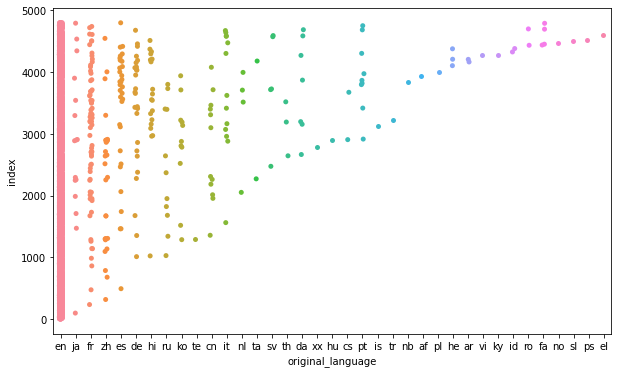

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
sns.stripplot(data=data,x="original_language", y="index",size=5, ax=ax)
plt.show()

# Feature selction
* this will be a content-based recommendation system
* relies on 'genres', 'keywords', 'tagline', 'cast' and 'director' columns

In [19]:
featrues=['genres', 'keywords', 'tagline', 'cast', 'director']
print(featrues)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [20]:
ft_df= data[featrues]
ft_df.head()

,genres,keywords,tagline,cast,director
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Enter the World of Pandora.,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"At the end of the world, the adventure begins.",Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski
2,Action Adventure Crime,spy based on novel secret agent sequel mi6,A Plan No One Escapes,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes
3,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,The Legend Ends,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan
4,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,"Lost in our world, found in another.",Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton


In [21]:
#combinig all featrues in on string per row
features_combined = ft_df[ft_df.columns[0:]].apply(lambda x: ' '.join(
    x.dropna().astype(str)),axis=1)

In [22]:
print(features_combined)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance independent film A newlywed cou...
4800    Comedy Drama Romance TV Movie date love at fir...
4801    Drama independent film A New Yorker in Shangha...
4802    Documentary obsession camcorder crush dream gi...
Length: 4749, dtype: object


In [23]:
#victorization of features
vectorizer = TfidfVectorizer()
featuresVectors = vectorizer.fit_transform(features_combined)
print(featuresVectors)

  (0, 2422)	0.17268038120056645
  (0, 7730)	0.11264740930392933
  (0, 12975)	0.19423283932051053
  (0, 10191)	0.16087211655956277
  (0, 8726)	0.22714843713839508
  (0, 14555)	0.1514231821656188
  (0, 16611)	0.19843714690628717
  (0, 14011)	0.20597953700673463
  (0, 13270)	0.2177878016477383
  (0, 17232)	0.2019902872156939
  (0, 16950)	0.23650907262905188
  (0, 13300)	0.15012667097698057
  (0, 11460)	0.2722558575855669
  (0, 11150)	0.09037611484121014
  (0, 16941)	0.128214759191582
  (0, 15206)	0.07083459559121438
  (0, 4927)	0.24034151187132421
  (0, 14218)	0.21395536240546598
  (0, 3215)	0.24970214736198101
  (0, 16530)	0.12536197356168838
  (0, 14325)	0.33952913899911746
  (0, 5816)	0.16461625689854795
  (0, 3055)	0.22213266291165124
  (0, 3666)	0.21395536240546598
  (0, 5417)	0.10352869407931273
  :	:
  (4747, 1664)	0.15462687638956593
  (4747, 10889)	0.13317794321539195
  (4747, 7450)	0.11152595739902912
  (4747, 4491)	0.05865865366050151
  (4747, 3783)	0.32985053200716213
  (4748,

In [24]:
#similarity scores
similarity = cosine_similarity(featuresVectors)
print(similarity)

[[1.         0.07198129 0.03790869 ... 0.         0.         0.        ]
 [0.07198129 1.         0.03294199 ... 0.035221   0.         0.        ]
 [0.03790869 0.03294199 1.         ... 0.01263919 0.05353232 0.01231848]
 ...
 [0.         0.035221   0.01263919 ... 1.         0.00332073 0.0523981 ]
 [0.         0.         0.05353232 ... 0.00332073 1.         0.        ]
 [0.         0.         0.01231848 ... 0.0523981  0.         1.        ]]


# User input and similarity score

In [25]:
#user input
#user_input = input("What's your favourite movie? ")
print("What's your favourite movie? ") #using print instead of input for the scripting view purposes
user_input = 'deadpool'
print(user_input)

What's your favourite movie? 
deadpool


In [26]:
movies_names = data['title'].tolist()

In [27]:
#finding closest match for the given input in our dataset movies titles
match = difflib.get_close_matches(user_input, movies_names)
print(match)

['Deadpool', 'Tadpole']


In [28]:
#get the index of that movie
movie_index = data[data.title == match[0]]['index'].values[0]
print(movie_index)

788


In [29]:
#use similarity score on that index to get similarities with all other indices
similarity_score = list(enumerate(similarity[movie_index]))

In [30]:
#sort similarities and recommend higher values only
sorted_similarity_score = sorted(similarity_score,key=lambda x:x[1],reverse=True)


In [31]:
#reverse the given similar index into the movie title
print('Recommended movies for you:')
i=1
for movie in sorted_similarity_score:
    index = movie[0]
    titleOfMovie = data[data.index==index]['title'].values
    if(i<6):
        print(i,'.',titleOfMovie)
        i+=1

Recommended movies for you:
1 . ['Deadpool']
2 . ['The Incredible Hulk']
3 . ['Iron Man 2']
4 . ['X-Men']
5 . ['Avengers: Age of Ultron']


In [32]:
#code including input and output in one cell
user_input = 'shutter island'#input("What's your favourite movie? ")
movies_names = data['title'].tolist()
match = difflib.get_close_matches(user_input, movies_names)
movie_index = data[data.title == match[0]]['index'].values[0]
similarity_score = list(enumerate(similarity[movie_index]))
sorted_similarity_score = sorted(similarity_score,key=lambda x:x[1],reverse=True)
print('Recommended movies for you:')
i=1
for movie in sorted_similarity_score:
    index = movie[0]
    titleOfMovie = data[data.index==index]['title'].values
    if(i<6):
        print(i,'.',titleOfMovie)
        i+=1

Recommended movies for you:
1 . ['Shutter Island']
2 . ['The Departed']
3 . ['The Wolf of Wall Street']
4 . ['The Pink Panther']
5 . ['Gangs of New York']
